## Report Data Visualization

Data visulize giúp chúng ta có thể giải thích dữ liệu một cách trực quan
Các tài liệu và khóa học đã được tiếp cận.
1. [Google data analysis: Share Data Through the Art of Visualization](https://www.coursera.org/learn/visualize-data)
2. [Visualize dữ liệu bằng matplotlib](https://www.youtube.com/watch?v=Ak7GamuoIr4&t=3280s)


**Trong đó ở mục 1:**
+ Biết được các loại biểu đồ: bar chart, line chart, pie chart, histogram, scatter plot
+ Biết được tình huống nào phù hợp với biểu đồ nào (sẽ được trình bày chi tiết hơn ở phía dưới)
+ Static Visualize (tĩnh) và Dynamic Visualize (dữ liệu thay đổi theo thời gian)
+ Phân biệt các 2 mối quan hệ tương quan (correlation) và nhân quả (causation)
+ Tác động của các chi tiết nhỏ ảnh hưởng đến trực quan hóa:
    * Hình dáng và màu sắc: để có thể thể hiện các sắc thái khác nhau của đặc trưng (lớn bé) (màu càng đậm càng đông dân số, và ngược lại)
    * Space: có khoảng cách hợp lí giữa các cột trong biểu đồ, tránh việc có quá nhiều thông tin.
    * Movement: cho thấy sự thay đổi của dữ liệu, có thể tăng trưởng hoặc xa sút.
    
+ Biết được các thành phần trong 1 biểu đồ:
    * Healine: là dòng chữ lớn ở trên hoặc dưới biểu đồ, thể hiện data nào đang được visualize
    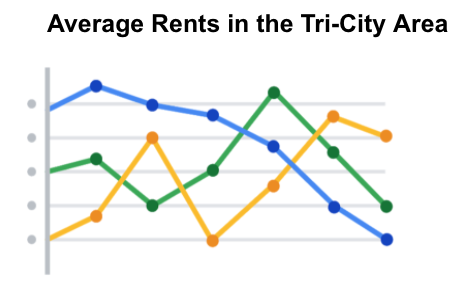
    * Subtitle: hỗ trợ thêm phần ý nghĩa cho Headline (như ở dưới đang cho biết tên của 3 thành phố)
    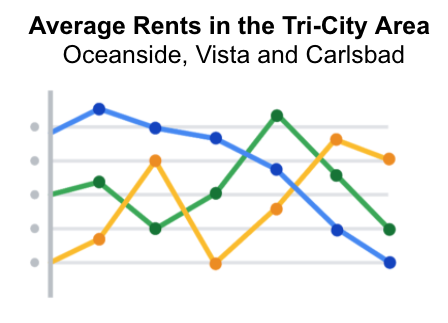
    * Label: identify trục x và trục y đang thể hiện kiểu dữ liệu gì
    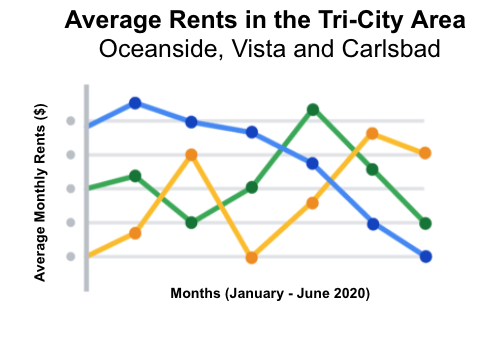
    * Legend: giống như label nhưng lúc này ta gán trực tiếp vào chart
    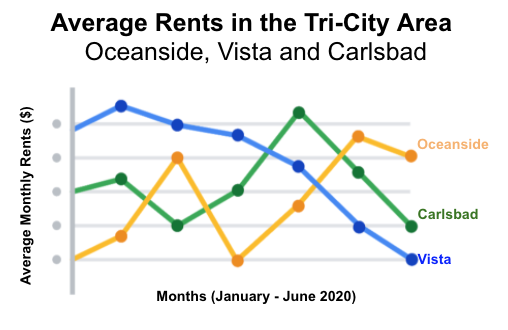
    * Annotations: ghi chú tường minh, mục đích vẫn để người dùng hiểu rõ hơn
    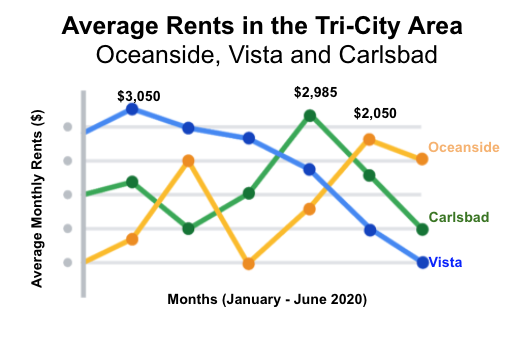

**Mục 2:**
   + Tạo các biểu đồ bằng thư viện matplotlib bằng 2 cách pylot API và OO API (oriented object)
   + Áp dụng các kiến thức đã học từ khóa coursera để tạo được biểu đồ trực quan, dễ nhìn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Vẽ biểu đồ bằng pyplot API**
Ta sẽ tiến hành vẽ các biểu đồ liên quan đến [Inflation, Consumer Prices](https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG?end=2021&locations=VN&start=1996&view=chart)


**Đầu tiên ta sẽ tiến hành đọc file csv, tuy nhiên đây là file chứa tất cả các nước trên thế giới ta chỉ quan tâm đến Việt Nam và tình hình chung của thể giới**

In [3]:
consumer_prices = pd.read_csv('/home/it/Desktop/NTMINH/Test/Data/consumer_prices.csv')
consumer_prices.head() 

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                          Indicator Name  Indicator Code  1960  1961  1962  \
0  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
1  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
2  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
3  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   
4  Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   NaN   NaN   NaN   

   1963  1964  1965  ...      2013      2014      2015       2016       2017  \
0   NaN   NaN   NaN  ... -2.372065  0.421441  0.474764  -0.931196  -1.028282   
1   NaN   NaN   NaN  ...  5.750981  5.370290  5.250171   6.571396   6.399343   
2   NaN   NaN   NaN  ...  7.385772  4.673996 -0.661709   4.383892   4.975952   
3   NaN   NaN   NaN  ...  2.439201  1.758052  2.130268   1.494564   1.764635   
4   NaN   NaN   NaN  ...  8.777814  7.280387  9.150372  30.695313  29.843587   

        2018       2019      2020      2021  Unnamed: 66  
0   3.626041   4.257462       NaN       NaN          NaN  
1   4.720811   4.120246  5.404815  7.240978          NaN  
2   0.626149   2.302373       NaN       NaN          NaN  
3   1.784050   1.758565  2.492522  3.925603          NaN  
4  19.628608  17.081215       NaN       NaN          NaN  

[5 rows x 67 columns]

In [42]:
# tìm dòng chứa thông tin Việt Nam
row_Vietnam = 0
country_names = consumer_prices['Country Name']
for index, name in enumerate(country_names):
    if name.lower() == 'vietnam':
        row_Vietnam = index
        break
print(row_Vietnam)
consumer_prices_Vietnam =  consumer_prices.iloc[row_Vietnam]
print(consumer_prices_Vietnam)

257
Country Name                                    Vietnam
Country Code                                        VNM
Indicator Name    Inflation, consumer prices (annual %)
Indicator Code                           FP.CPI.TOTL.ZG
1960                                                NaN
                                  ...                  
2018                                           3.539628
2019                                           2.795824
2020                                           3.220934
2021                                           1.834716
Unnamed: 66                                         NaN
Name: 257, Length: 67, dtype: object


In [59]:
# loại trừ những năm không được thu thập
consumer_prices_Vietnam = consumer_prices_Vietnam.dropna()
consumer_prices_Vietnam

Country Name                                    Vietnam
Country Code                                        VNM
Indicator Name    Inflation, consumer prices (annual %)
Indicator Code                           FP.CPI.TOTL.ZG
1996                                              5.675
1997                                           3.209526
1998                                           7.266198
1999                                           4.117102
2000                                          -1.710337
2001                                          -0.431545
2002                                           3.830828
2003                                           3.234648
2004                                           7.754947
2005                                           8.284572
2006                                           7.418017
2007                                           8.344449
2008                                          23.115448
2009                                           6

In [66]:
# Loại 4 dòng đầu để tiến hành vẽ biểu đồ (là những dòng không phải năm)
data = consumer_prices_Vietnam[4:]
data

1996        5.675
1997     3.209526
1998     7.266198
1999     4.117102
2000    -1.710337
2001    -0.431545
2002     3.830828
2003     3.234648
2004     7.754947
2005     8.284572
2006     7.418017
2007     8.344449
2008    23.115448
2009     6.716983
2010     9.207466
2011    18.677732
2012     9.094703
2013     6.592675
2014     4.084554
2015     0.631201
2016     2.668248
2017     3.520257
2018     3.539628
2019     2.795824
2020     3.220934
2021     1.834716
Name: 257, dtype: object

In [88]:
print(list(data.index))

['1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [111]:
def find_max_min_local(series, threshold = 8):
    """
        Input: 
            series: list
        Return:
            list of index
    """
    result = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1]:
            temp = series[i]*2 - series[i - 1] - series[i + 1]
            if temp > threshold:
                result.append(i)
        elif series[i] < series[i - 1] and series[i] < series[i + 1]: 
            temp = series[i - 1] + series[i + 1] - series[i]*2
            if temp > threshold:
                result.append(i)
    return result


[Text(0.5, 1.0, 'Lạm phát giá tiêu dùng ở Việt Nam'),
 Text(0.5, 0, 'Năm'),
 Text(0, 0.5, '%')]

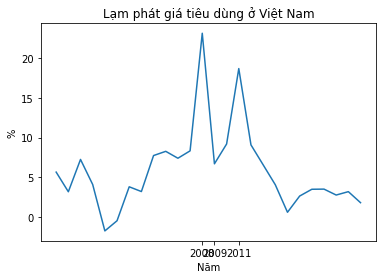

In [112]:
from datetime import datetime, timedelta
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib.ticker as ticker 
fig, ax = plt.subplots()
ax.plot(list(data.index), list(data.values))

# chỉ định trục x hiện như thế nào, cụ thể ta chỉ định những năm
# có biến động lớn như cực đại và cực tiểu
indices = find_max_min_local(data.tolist())
ax.set_xticks(indices)
ax.set(title = 'Lạm phát giá tiêu dùng ở Việt Nam',
        xlabel = 'Năm',
        ylabel = '%')